In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.family']=['sans-serif']
plt.rcParams['font.sans-serif']=['SimHei']

In [3]:
df=pd.read_csv('../data/ad_performance.txt',delimiter='\t')
df.tail(5)

,渠道代号,日均UV,平均注册率,平均搜索量,访问深度,平均停留时间,订单转化率,投放总时间,素材类型,广告类型,合作方式,广告尺寸,广告卖点
884,A38,1777.75,0.0002,0.0023,1.2588,513.28,0.0002,5.0,swf,通栏,cpc,900*120,打折
885,A39,1953.53,0.0003,0.0026,1.1703,633.08,0.0002,16.0,swf,通栏,cpc,900*120,打折
886,A40,310.53,0.0002,0.0028,1.1546,543.80,0.0001,22.0,swf,通栏,cpc,900*120,打折
887,A41,1370.38,0.0001,0.0016,1.3939,613.32,0.0001,10.0,swf,通栏,cpd,900*120,打折
888,A826,0.86,0.0000,0.0000,52.6591,1932.61,0.0000,19.0,gif,暂停,cpc,390*270,直降


In [4]:
df.isnull().sum()

渠道代号      0
日均UV      0
平均注册率     0
平均搜索量     0
访问深度      0
平均停留时间    2
订单转化率     0
投放总时间     0
素材类型      0
广告类型      0
合作方式      0
广告尺寸      0
广告卖点      0
dtype: int64

In [5]:
df.describe().round(3)

,日均UV,平均注册率,平均搜索量,访问深度,平均停留时间,订单转化率,投放总时间
count,889.000,889.000,889.000,889.000,887.000,889.000,889.000
mean,540.847,0.001,0.030,2.167,262.669,0.003,16.053
std,1634.410,0.003,0.106,3.801,224.365,0.012,8.509
min,0.060,0.000,0.000,1.000,1.640,0.000,1.000
25%,6.180,0.000,0.001,1.392,126.020,0.000,9.000
50%,114.180,0.000,0.003,1.793,236.550,0.000,16.000
75%,466.870,0.001,0.012,2.216,357.985,0.002,24.000
max,25294.770,0.039,1.037,98.980,4450.830,0.216,30.000


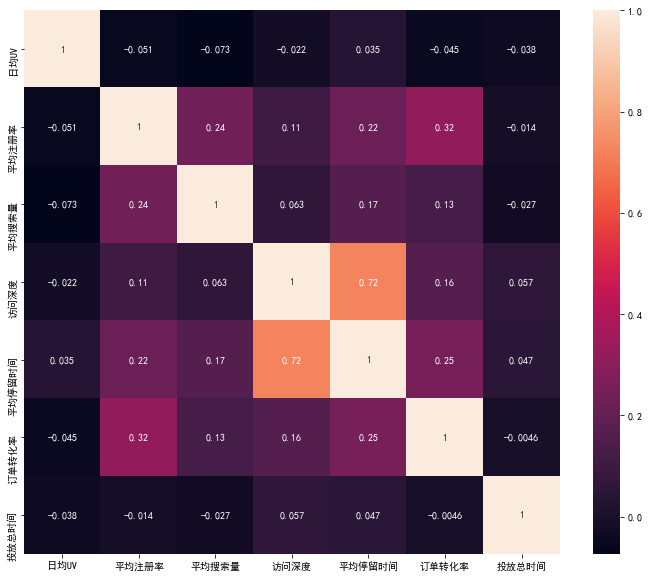

In [8]:
plt.figure(figsize=(12,10))
p=sns.heatmap(df.corr(),annot=True)
plt.show()

In [9]:
df['平均停留时间']=df['平均停留时间'].fillna(df['平均停留时间'].mean())
conver_cols=['素材类型','广告类型','合作方式','广告尺寸','广告卖点']
dummy_df=pd.get_dummies(df[conver_cols])
df2=df.drop(conver_cols,axis=1)
df2=pd.concat([df2,dummy_df],axis=1)

In [10]:
df2.tail().T

,884,885,886,887,888
渠道代号,A38,A39,A40,A41,A826
日均UV,1777.75,1953.53,310.53,1370.38,0.86
平均注册率,0.0002,0.0003,0.0002,0.0001,0
平均搜索量,0.0023,0.0026,0.0028,0.0016,0
访问深度,1.2588,1.1703,1.1546,1.3939,52.6591
平均停留时间,513.28,633.08,543.8,613.32,1932.61
订单转化率,0.0002,0.0002,0.0001,0.0001,0
投放总时间,5,16,22,10,19
素材类型_gif,0,0,0,0,1
素材类型_jpg,0,0,0,0,0


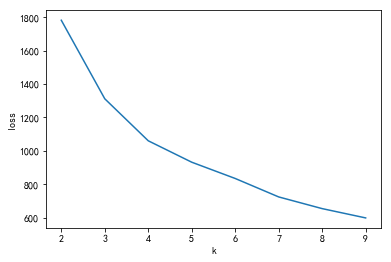

In [13]:
scale_matrix=df2.iloc[:,1:8]
minmax_scaler=MinMaxScaler()
df2.iloc[:,1:8]=minmax_scaler.fit_transform(scale_matrix)
X=np.array(df2.iloc[:,1:])
loss=[]
for i in range(2,10):
    model=KMeans(n_clusters=i).fit(X)
    loss.append(model.inertia_)
plt.plot(range(2,10),loss)
plt.xlabel('k')
plt.ylabel('loss')
plt.show()

In [15]:
k=4
model=KMeans(n_clusters=k).fit(X)
df['clusters']=model.labels_
cluster_count=pd.DataFrame(df.clusters.value_counts()).rename(columns={'clusters':'counts'})
cluster_count['percentage']=(cluster_count['counts']/cluster_count['counts'].sum()).round(2)
cluster_count.head()

,counts,percentage
1,381,0.43
2,276,0.31
3,157,0.18
0,75,0.08


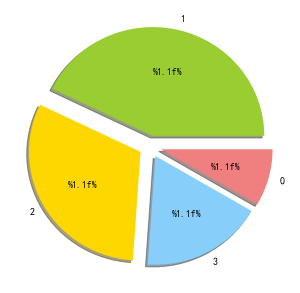

In [18]:
colors='yellowgreen','gold','lightskyblue','lightcoral'
explode=0.1,0.1,0.1,0.1
plt.figure(figsize=(5,5))
plt.pie(cluster_count.counts,explode=explode,labels=cluster_count.index,colors=colors,autopct='%%1.1f%%',shadow=True)
plt.show()

In [19]:
df.describe()

,日均UV,平均注册率,平均搜索量,访问深度,平均停留时间,订单转化率,投放总时间,cluster,clusters
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,540.846772,0.001408,0.030493,2.167166,262.669188,0.002852,16.052868,1.579303,1.579303
std,1634.410463,0.003291,0.106199,3.800528,224.112126,0.011608,8.509435,0.875504,0.875504
min,0.060000,0.000000,0.000000,1.000000,1.640000,0.000000,1.000000,0.000000,0.000000
25%,6.180000,0.000000,0.000600,1.392300,126.200000,0.000000,9.000000,1.000000,1.000000
50%,114.180000,0.000000,0.003200,1.793100,236.660000,0.000200,16.000000,1.000000,1.000000
75%,466.870000,0.001400,0.011800,2.216200,357.930000,0.002000,24.000000,2.000000,2.000000
max,25294.770000,0.039100,1.037000,98.979900,4450.830000,0.216500,30.000000,3.000000,3.000000


In [20]:
df.describe(include=['O']) 

,渠道代号,素材类型,广告类型,合作方式,广告尺寸,广告卖点
count,889,889,889,889,889,889
unique,889,4,6,4,8,6
top,A500,jpg,不确定,cpc,600*90,打折
freq,1,536,654,592,645,337


In [22]:
cluster_features=[]
for line in range(k):
    label_data=df[df['clusters']==line]
    part1_data=label_data.iloc[:,1:8]
    part1_desc=part1_data.describe().round(3)
    merge_data1=part1_desc.iloc[1,:]
    part2_data=label_data.iloc[:,8:-1]
    part2_desc=part2_data.describe(include='all')
    merge_data2=part2_desc.iloc[2,:]
    merge_line=pd.concat((merge_data1,merge_data2),axis=0)
    cluster_features.append(merge_line)
cluster_pd=pd.DataFrame(cluster_features)
all_cluster_set=cluster_count.join(cluster_pd).sort_index().T
all_cluster_set

,0,1,2,3
counts,75,381,276,157
percentage,0.08,0.43,0.31,0.18
日均UV,1368.3,311.403,598.991,600.153
平均注册率,0.001,0.001,0.001,0.003
平均搜索量,0.032,0.02,0.051,0.02
访问深度,2.417,2.186,2.065,2.182
平均停留时间,434.877,233.569,267.77,242.058
订单转化率,0.002,0.002,0.004,0.003
投放总时间,15.587,15.593,17.033,15.669
素材类型,swf,jpg,swf,jpg
